In [1108]:

#import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline

from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import precision_score


In [1109]:
df = pd.read_csv('/Users/aimaldastagirzada/Downloads/archive (7)/RAW_recipes.csv')



In [1110]:
df

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10


In [1111]:
df.dtypes

name              object
id                 int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object

In [1112]:
df.head(1)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7


In [1113]:
df['nutrition'] = df['nutrition'].str.replace(r'[\[\]]', '', regex=True)


In [1114]:
df[['Calories', 'Total_fat', 'Sugar', 'Sodium', 'Protein', 'Saturated_fat', 'Carbs']] = df['nutrition'].str.split(',', expand=True).astype(float)


In [1115]:
df.head(1)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0


In [1116]:
df.drop(columns='nutrition', inplace=True)


In [1117]:
df

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22,415.2,26.0,34.0,26.0,44.0,21.0,15.0
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13,14.8,0.0,2.0,58.0,1.0,0.0,1.0
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,59.2,6.0,2.0,3.0,6.0,5.0,0.0
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10,188.0,11.0,57.0,11.0,7.0,21.0,9.0


In [1118]:
thresholds = {
    'Calories': 560,
    'Total_fat': 20,
    'Sugar': 10,
    'Sodium': 600,
    'Protein': 15,
    'Saturated_fat': 6,
    'Carbs': 80
}

In [1119]:
# Function to classify as healthy or unhealthy
def classify(row):
    is_healthy = all(row[key] < threshold for key, threshold in thresholds.items())
    return 1 if is_healthy else 0

In [1120]:
# Apply classification to the dataset
df['is_healthy'] = df.apply(classify, axis=1)

In [1121]:
df

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs,is_healthy
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22,415.2,26.0,34.0,26.0,44.0,21.0,15.0,0
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13,14.8,0.0,2.0,58.0,1.0,0.0,1.0,1
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,59.2,6.0,2.0,3.0,6.0,5.0,0.0,1
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10,188.0,11.0,57.0,11.0,7.0,21.0,9.0,0


In [1122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            231636 non-null  object 
 1   id              231637 non-null  int64  
 2   minutes         231637 non-null  int64  
 3   contributor_id  231637 non-null  int64  
 4   submitted       231637 non-null  object 
 5   tags            231637 non-null  object 
 6   n_steps         231637 non-null  int64  
 7   steps           231637 non-null  object 
 8   description     226658 non-null  object 
 9   ingredients     231637 non-null  object 
 10  n_ingredients   231637 non-null  int64  
 11  Calories        231637 non-null  float64
 12  Total_fat       231637 non-null  float64
 13  Sugar           231637 non-null  float64
 14  Sodium          231637 non-null  float64
 15  Protein         231637 non-null  float64
 16  Saturated_fat   231637 non-null  float64
 17  Carbs     

In [1123]:
df.describe()

,id,minutes,contributor_id,n_steps,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs,is_healthy
count,231637.000000,2.316370e+05,2.316370e+05,231637.000000,231637.000000,231637.000000,231637.00000,231637.000000,231637.000000,231637.00000,231637.000000,231637.000000,231637.000000
mean,222014.708984,9.398546e+03,5.534885e+06,9.765499,9.051153,473.942425,36.08070,84.296865,30.147485,34.68186,45.589150,15.560403,0.051408
std,141206.635626,4.461963e+06,9.979141e+07,5.995128,3.734796,1189.711374,77.79884,800.080897,131.961589,58.47248,98.235758,81.824560,0.220829
min,38.000000,0.000000e+00,2.700000e+01,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,99944.000000,2.000000e+01,5.690500e+04,6.000000,6.000000,174.400000,8.00000,9.000000,5.000000,7.00000,7.000000,4.000000,0.000000
50%,207249.000000,4.000000e+01,1.736140e+05,9.000000,9.000000,313.400000,20.00000,25.000000,14.000000,18.00000,23.000000,9.000000,0.000000
75%,333816.000000,6.500000e+01,3.982750e+05,12.000000,11.000000,519.700000,41.00000,68.000000,33.000000,51.00000,52.000000,16.000000,0.000000
max,537716.000000,2.147484e+09,2.002290e+09,145.000000,43.000000,434360.200000,17183.00000,362729.000000,29338.000000,6552.00000,10395.000000,36098.000000,1.000000


In [1124]:
df.drop(columns='id', inplace=True)

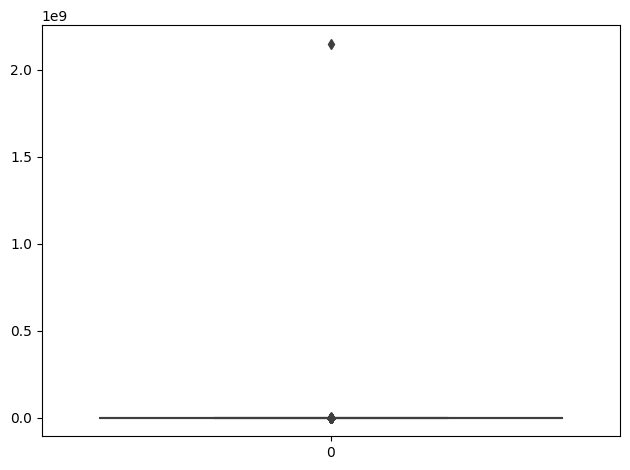

In [1125]:
sns.boxplot(df['minutes'])

plt.tight_layout()

In [1126]:
df['minutes'].describe(include='all')

count    2.316370e+05
mean     9.398546e+03
std      4.461963e+06
min      0.000000e+00
25%      2.000000e+01
50%      4.000000e+01
75%      6.500000e+01
max      2.147484e+09
Name: minutes, dtype: float64

In [1127]:
df=df[df['minutes']<1000]

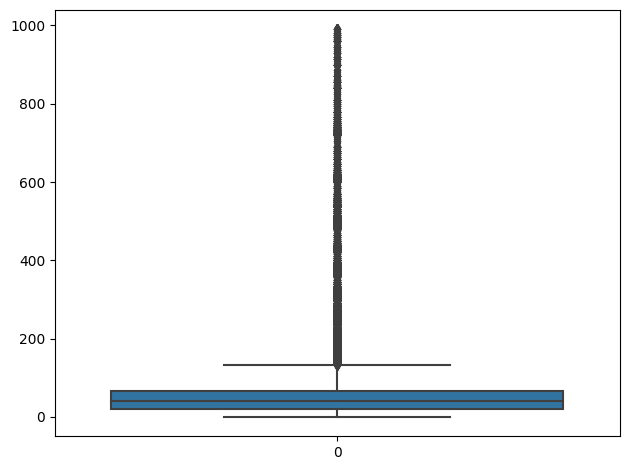

In [1128]:
sns.boxplot(df['minutes'])

plt.tight_layout()

In [1129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229396 entries, 0 to 231636
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            229395 non-null  object 
 1   minutes         229396 non-null  int64  
 2   contributor_id  229396 non-null  int64  
 3   submitted       229396 non-null  object 
 4   tags            229396 non-null  object 
 5   n_steps         229396 non-null  int64  
 6   steps           229396 non-null  object 
 7   description     224450 non-null  object 
 8   ingredients     229396 non-null  object 
 9   n_ingredients   229396 non-null  int64  
 10  Calories        229396 non-null  float64
 11  Total_fat       229396 non-null  float64
 12  Sugar           229396 non-null  float64
 13  Sodium          229396 non-null  float64
 14  Protein         229396 non-null  float64
 15  Saturated_fat   229396 non-null  float64
 16  Carbs           229396 non-null  float64
 17  is_healthy     

In [1130]:
df['minutes'].describe(include='all')

count    229396.000000
mean         63.434380
std          92.213224
min           0.000000
25%          20.000000
50%          40.000000
75%          65.000000
max         990.000000
Name: minutes, dtype: float64

In [1131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229396 entries, 0 to 231636
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            229395 non-null  object 
 1   minutes         229396 non-null  int64  
 2   contributor_id  229396 non-null  int64  
 3   submitted       229396 non-null  object 
 4   tags            229396 non-null  object 
 5   n_steps         229396 non-null  int64  
 6   steps           229396 non-null  object 
 7   description     224450 non-null  object 
 8   ingredients     229396 non-null  object 
 9   n_ingredients   229396 non-null  int64  
 10  Calories        229396 non-null  float64
 11  Total_fat       229396 non-null  float64
 12  Sugar           229396 non-null  float64
 13  Sodium          229396 non-null  float64
 14  Protein         229396 non-null  float64
 15  Saturated_fat   229396 non-null  float64
 16  Carbs           229396 non-null  float64
 17  is_healthy     

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

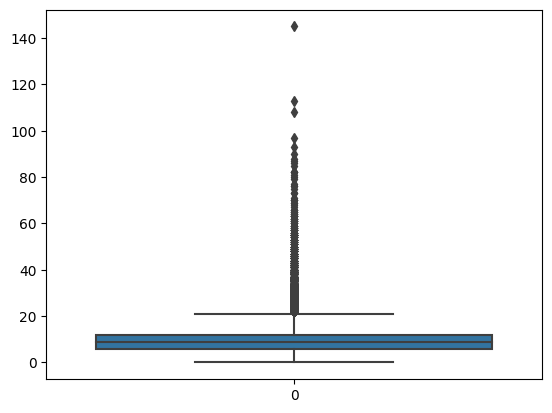

In [1132]:
sns.boxplot(df['n_steps'])
plt.tight_layout


In [1133]:
df = df[df['n_steps']< 30]

In [1134]:
df['n_steps'].describe()

count    226984.000000
mean          9.447754
std           5.193343
min           0.000000
25%           6.000000
50%           8.000000
75%          12.000000
max          29.000000
Name: n_steps, dtype: float64

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

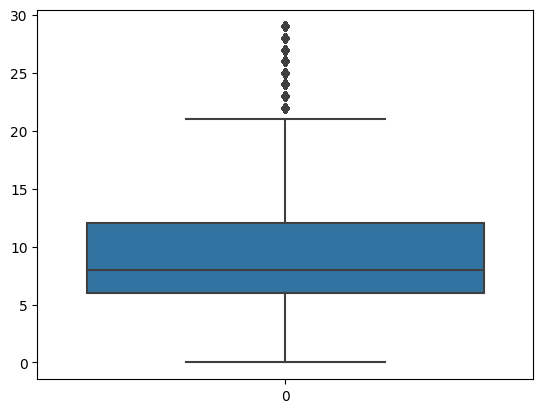

In [1135]:
sns.boxplot(df['n_steps'])
plt.tight_layout

In [1136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226984 entries, 0 to 231636
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            226983 non-null  object 
 1   minutes         226984 non-null  int64  
 2   contributor_id  226984 non-null  int64  
 3   submitted       226984 non-null  object 
 4   tags            226984 non-null  object 
 5   n_steps         226984 non-null  int64  
 6   steps           226984 non-null  object 
 7   description     222078 non-null  object 
 8   ingredients     226984 non-null  object 
 9   n_ingredients   226984 non-null  int64  
 10  Calories        226984 non-null  float64
 11  Total_fat       226984 non-null  float64
 12  Sugar           226984 non-null  float64
 13  Sodium          226984 non-null  float64
 14  Protein         226984 non-null  float64
 15  Saturated_fat   226984 non-null  float64
 16  Carbs           226984 non-null  float64
 17  is_healthy     

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

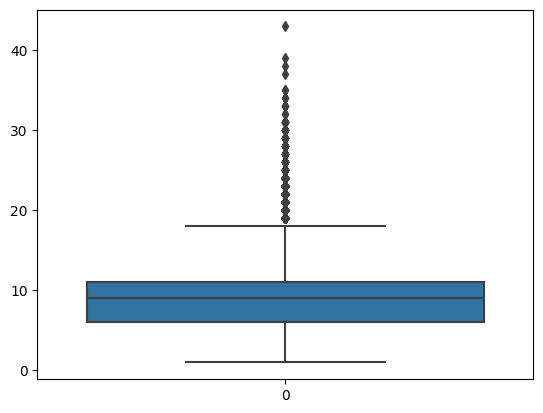

In [1137]:
sns.boxplot(df['n_ingredients'])
plt.tight_layout

In [1138]:
df= df[df['n_ingredients']<30]

In [1139]:
df['n_ingredients'].describe()

count    226942.000000
mean          8.997444
std           3.664212
min           1.000000
25%           6.000000
50%           9.000000
75%          11.000000
max          29.000000
Name: n_ingredients, dtype: float64

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

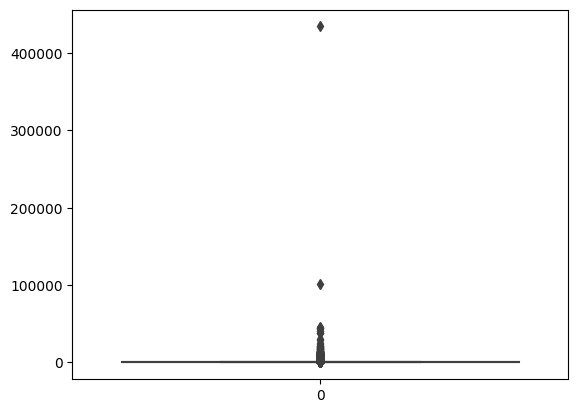

In [1140]:
sns.boxplot(df['Calories'])
plt.tight_layout

In [1141]:
df['Calories'].describe()

count    226942.000000
mean        467.236428
std        1182.145899
min           0.000000
25%         173.600000
50%         311.300000
75%         515.200000
max      434360.200000
Name: Calories, dtype: float64

In [1142]:
df=df[df['Calories'] < 4000]

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

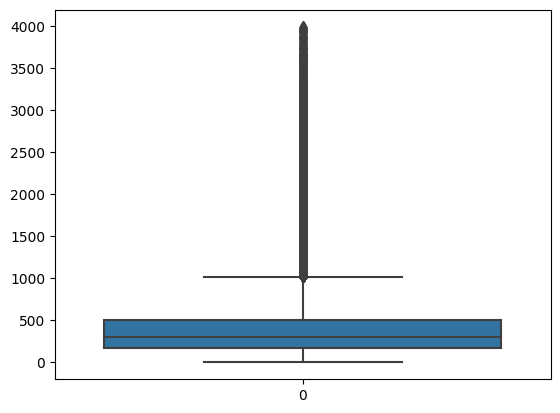

In [1143]:
sns.boxplot(df['Calories'])
plt.tight_layout

In [1144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225297 entries, 0 to 231636
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            225296 non-null  object 
 1   minutes         225297 non-null  int64  
 2   contributor_id  225297 non-null  int64  
 3   submitted       225297 non-null  object 
 4   tags            225297 non-null  object 
 5   n_steps         225297 non-null  int64  
 6   steps           225297 non-null  object 
 7   description     220475 non-null  object 
 8   ingredients     225297 non-null  object 
 9   n_ingredients   225297 non-null  int64  
 10  Calories        225297 non-null  float64
 11  Total_fat       225297 non-null  float64
 12  Sugar           225297 non-null  float64
 13  Sodium          225297 non-null  float64
 14  Protein         225297 non-null  float64
 15  Saturated_fat   225297 non-null  float64
 16  Carbs           225297 non-null  float64
 17  is_healthy     

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

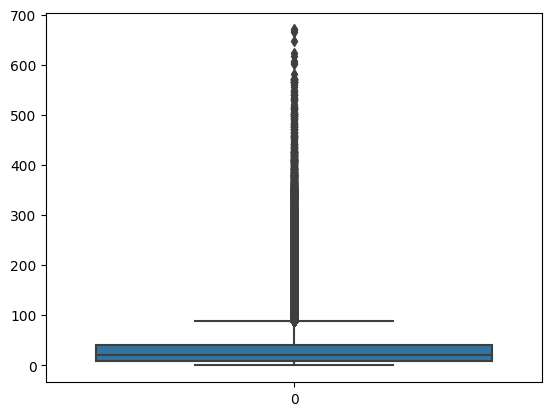

In [1145]:
sns.boxplot(df['Total_fat'])
plt.tight_layout

In [1146]:
df=df[df['Total_fat'] < 300]

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

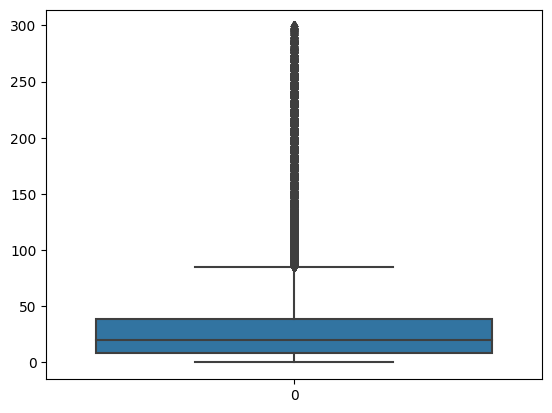

In [1147]:
sns.boxplot(df['Total_fat'])
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

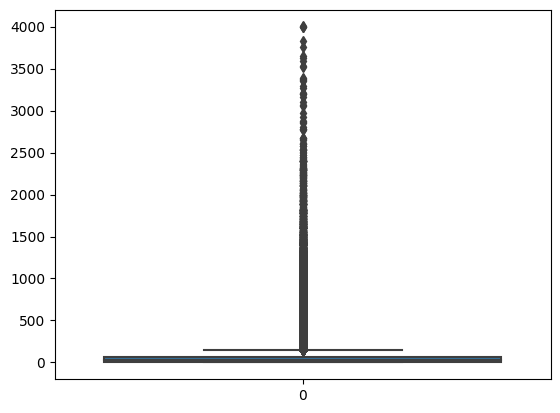

In [1148]:
sns.boxplot(df['Sugar'])
plt.tight_layout

In [1149]:
df=df[df['Sugar'] < 500]

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

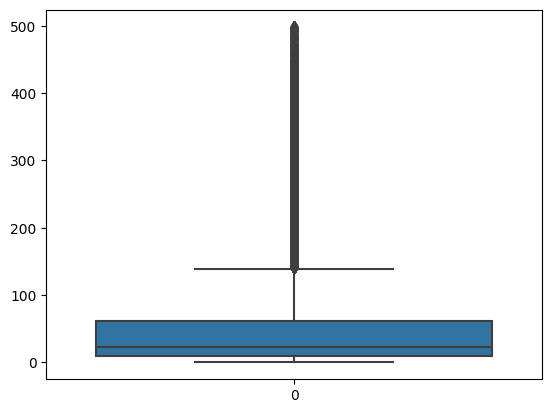

In [1150]:
sns.boxplot(df['Sugar'])
plt.tight_layout

In [1151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219996 entries, 0 to 231636
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            219995 non-null  object 
 1   minutes         219996 non-null  int64  
 2   contributor_id  219996 non-null  int64  
 3   submitted       219996 non-null  object 
 4   tags            219996 non-null  object 
 5   n_steps         219996 non-null  int64  
 6   steps           219996 non-null  object 
 7   description     215393 non-null  object 
 8   ingredients     219996 non-null  object 
 9   n_ingredients   219996 non-null  int64  
 10  Calories        219996 non-null  float64
 11  Total_fat       219996 non-null  float64
 12  Sugar           219996 non-null  float64
 13  Sodium          219996 non-null  float64
 14  Protein         219996 non-null  float64
 15  Saturated_fat   219996 non-null  float64
 16  Carbs           219996 non-null  float64
 17  is_healthy     

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

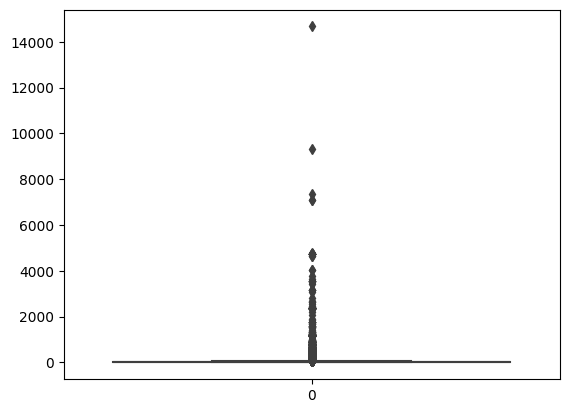

In [1152]:
sns.boxplot(df['Sodium'])
plt.tight_layout

In [1153]:
df=df[df['Sodium']<200]

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

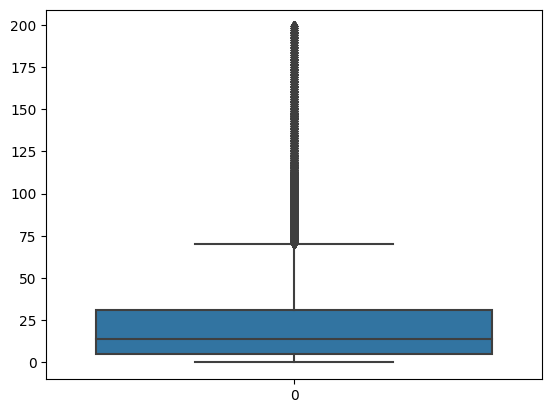

In [1154]:
sns.boxplot(df['Sodium'])
plt.tight_layout

In [1155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218343 entries, 0 to 231636
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            218342 non-null  object 
 1   minutes         218343 non-null  int64  
 2   contributor_id  218343 non-null  int64  
 3   submitted       218343 non-null  object 
 4   tags            218343 non-null  object 
 5   n_steps         218343 non-null  int64  
 6   steps           218343 non-null  object 
 7   description     213793 non-null  object 
 8   ingredients     218343 non-null  object 
 9   n_ingredients   218343 non-null  int64  
 10  Calories        218343 non-null  float64
 11  Total_fat       218343 non-null  float64
 12  Sugar           218343 non-null  float64
 13  Sodium          218343 non-null  float64
 14  Protein         218343 non-null  float64
 15  Saturated_fat   218343 non-null  float64
 16  Carbs           218343 non-null  float64
 17  is_healthy     

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

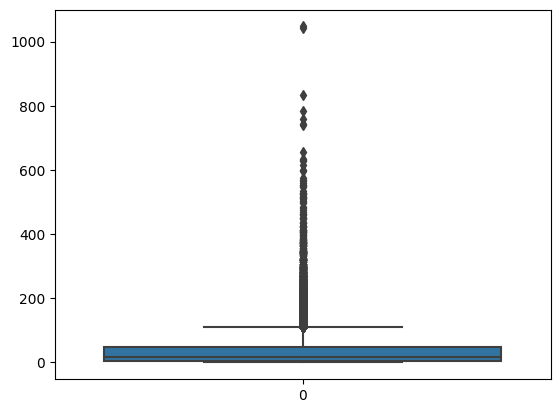

In [1156]:
sns.boxplot(df['Protein'])
plt.tight_layout

In [1157]:
df=df[df['Protein']<200]

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

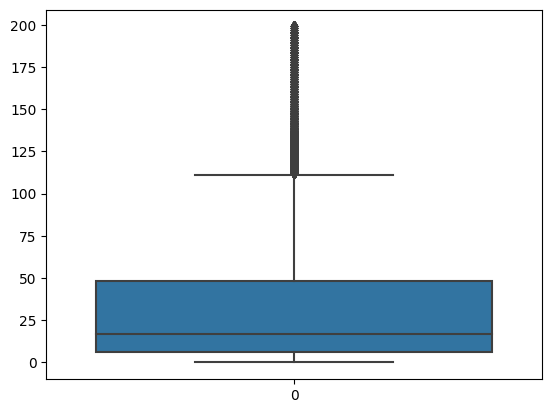

In [1158]:
sns.boxplot(df['Protein'])
plt.tight_layout

In [1159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217460 entries, 0 to 231636
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            217459 non-null  object 
 1   minutes         217460 non-null  int64  
 2   contributor_id  217460 non-null  int64  
 3   submitted       217460 non-null  object 
 4   tags            217460 non-null  object 
 5   n_steps         217460 non-null  int64  
 6   steps           217460 non-null  object 
 7   description     212941 non-null  object 
 8   ingredients     217460 non-null  object 
 9   n_ingredients   217460 non-null  int64  
 10  Calories        217460 non-null  float64
 11  Total_fat       217460 non-null  float64
 12  Sugar           217460 non-null  float64
 13  Sodium          217460 non-null  float64
 14  Protein         217460 non-null  float64
 15  Saturated_fat   217460 non-null  float64
 16  Carbs           217460 non-null  float64
 17  is_healthy     

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

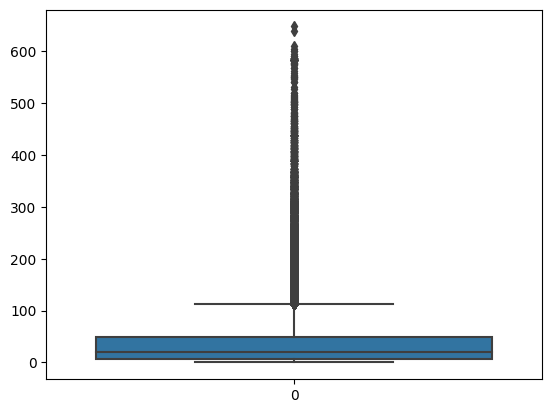

In [1160]:
sns.boxplot(df['Saturated_fat'])
plt.tight_layout

In [1161]:
df=df[df['Saturated_fat']<200]

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

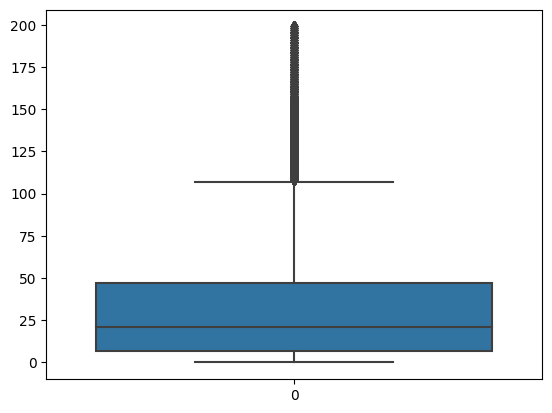

In [1162]:
sns.boxplot(df['Saturated_fat'])
plt.tight_layout


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

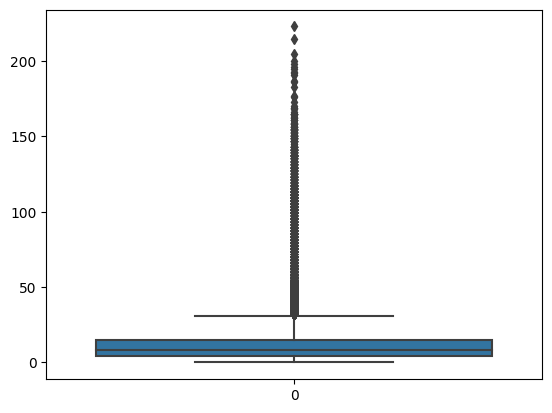

In [1163]:
sns.boxplot(df['Carbs'])
plt.tight_layout

In [1164]:
df=df[df['Carbs']<200]

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

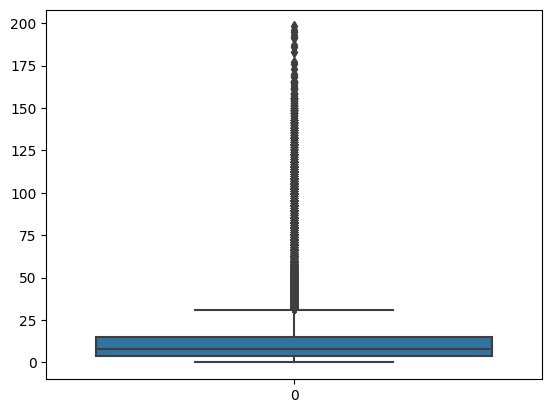

In [1165]:
sns.boxplot(df['Carbs'])
plt.tight_layout

In [1166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214865 entries, 0 to 231636
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            214864 non-null  object 
 1   minutes         214865 non-null  int64  
 2   contributor_id  214865 non-null  int64  
 3   submitted       214865 non-null  object 
 4   tags            214865 non-null  object 
 5   n_steps         214865 non-null  int64  
 6   steps           214865 non-null  object 
 7   description     210417 non-null  object 
 8   ingredients     214865 non-null  object 
 9   n_ingredients   214865 non-null  int64  
 10  Calories        214865 non-null  float64
 11  Total_fat       214865 non-null  float64
 12  Sugar           214865 non-null  float64
 13  Sodium          214865 non-null  float64
 14  Protein         214865 non-null  float64
 15  Saturated_fat   214865 non-null  float64
 16  Carbs           214865 non-null  float64
 17  is_healthy     

In [1167]:
df.describe(include='all')

,name,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs,is_healthy
count,214864,214865.000000,2.148650e+05,214865,214865,214865.000000,214865,210417,214865,214865.000000,214865.000000,214865.000000,214865.000000,214865.000000,214865.000000,214865.000000,214865.000000,214865.000000
unique,213607,NaN,NaN,5043,194320,NaN,214357,206769,213878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,gluten free chocolate chip cookies,NaN,NaN,2000-03-06,"['15-minutes-or-less', 'time-to-make', 'course...",NaN,['blend all ingredients until smooth'],yum,"['eggs', 'water']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,NaN,425,396,NaN,19,141,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,62.056487,5.208150e+06,NaN,NaN,9.417765,NaN,NaN,NaN,9.008968,359.149477,26.826854,48.799665,21.815531,30.181267,32.859819,11.119442,0.054122
std,NaN,90.685565,9.649609e+07,NaN,NaN,5.163540,NaN,NaN,NaN,3.653734,278.048682,27.659703,67.474049,25.455894,32.278327,35.599743,11.982692,0.226260
min,NaN,0.000000,2.700000e+01,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,20.000000,5.750500e+04,NaN,NaN,6.000000,NaN,NaN,NaN,6.000000,167.100000,8.000000,9.000000,5.000000,6.000000,7.000000,4.000000,0.000000
50%,NaN,35.000000,1.784270e+05,NaN,NaN,8.000000,NaN,NaN,NaN,9.000000,296.300000,19.000000,23.000000,14.000000,17.000000,21.000000,8.000000,0.000000
75%,NaN,65.000000,4.073380e+05,NaN,NaN,12.000000,NaN,NaN,NaN,11.000000,474.200000,37.000000,59.000000,30.000000,47.000000,47.000000,15.000000,0.000000


In [1168]:
df2=df.copy()

In [1169]:
df2

,name,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs,is_healthy
0,arriba baked winter squash mexican style,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,0
1,a bit different breakfast pizza,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,0
2,all in the kitchen chili,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,0
3,alouette potatoes,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,0
4,amish tomato ketchup for canning,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22,415.2,26.0,34.0,26.0,44.0,21.0,15.0,0
231633,zydeco spice mix,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13,14.8,0.0,2.0,58.0,1.0,0.0,1.0,1
231634,zydeco ya ya deviled eggs,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,59.2,6.0,2.0,3.0,6.0,5.0,0.0,1
231635,cookies by design cookies on a stick,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10,188.0,11.0,57.0,11.0,7.0,21.0,9.0,0


In [1170]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214865 entries, 0 to 231636
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            214864 non-null  object 
 1   minutes         214865 non-null  int64  
 2   contributor_id  214865 non-null  int64  
 3   submitted       214865 non-null  object 
 4   tags            214865 non-null  object 
 5   n_steps         214865 non-null  int64  
 6   steps           214865 non-null  object 
 7   description     210417 non-null  object 
 8   ingredients     214865 non-null  object 
 9   n_ingredients   214865 non-null  int64  
 10  Calories        214865 non-null  float64
 11  Total_fat       214865 non-null  float64
 12  Sugar           214865 non-null  float64
 13  Sodium          214865 non-null  float64
 14  Protein         214865 non-null  float64
 15  Saturated_fat   214865 non-null  float64
 16  Carbs           214865 non-null  float64
 17  is_healthy     

**Start from removing some more outliers and make feature enigeer of n-steps and incgredients**

In [1171]:
df2.head(1)

,name,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs,is_healthy
0,arriba baked winter squash mexican style,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,0


In [1172]:
df2.head(1)

,name,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs,is_healthy
0,arriba baked winter squash mexican style,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,0


<Axes: xlabel='is_healthy'>

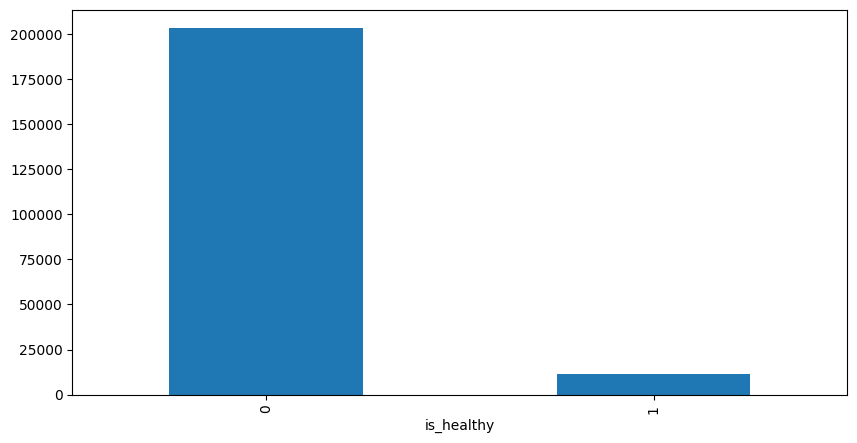

In [1173]:
df2.groupby('is_healthy')['Calories'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='is_healthy'>

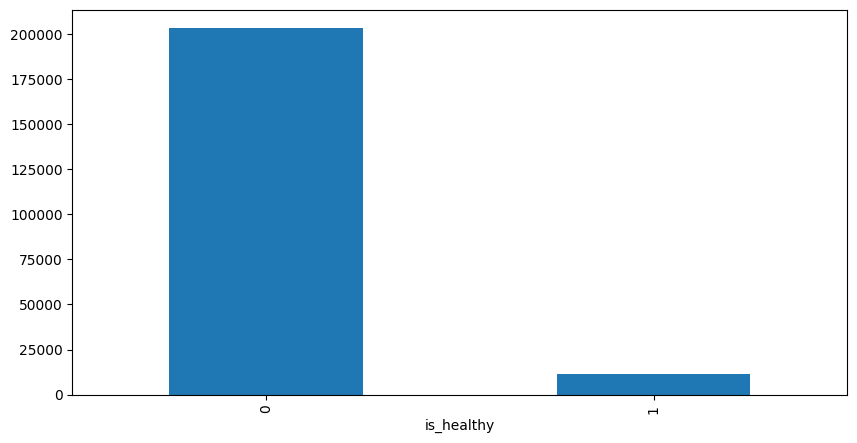

In [1174]:
df2.groupby('is_healthy') ['Total_fat'].count(). sort_values (ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='is_healthy'>

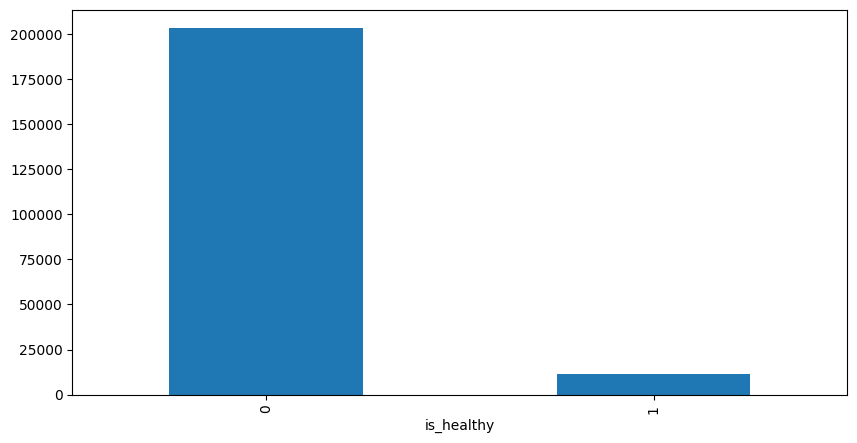

In [1175]:
df2.groupby('is_healthy') ['Protein'].count(). sort_values (ascending=False).plot(kind='bar', figsize=(10,5))

In [1176]:
df2

,name,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs,is_healthy
0,arriba baked winter squash mexican style,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,0
1,a bit different breakfast pizza,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,0
2,all in the kitchen chili,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,0
3,alouette potatoes,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,0
4,amish tomato ketchup for canning,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22,415.2,26.0,34.0,26.0,44.0,21.0,15.0,0
231633,zydeco spice mix,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13,14.8,0.0,2.0,58.0,1.0,0.0,1.0,1
231634,zydeco ya ya deviled eggs,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,59.2,6.0,2.0,3.0,6.0,5.0,0.0,1
231635,cookies by design cookies on a stick,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10,188.0,11.0,57.0,11.0,7.0,21.0,9.0,0


<Axes: xlabel='is_healthy', ylabel='Carbs'>

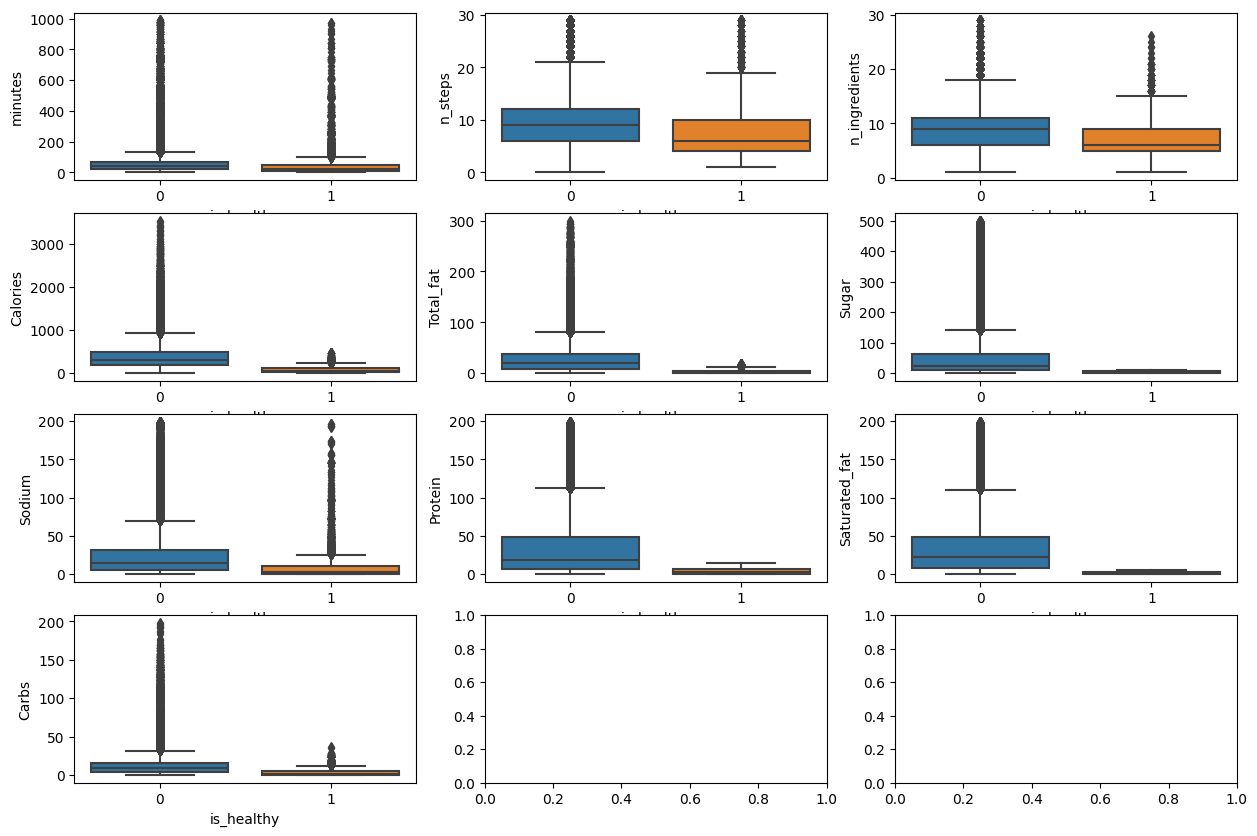

In [1178]:
fig, axs = plt.subplots(4,3, figsize=(15,10))
sns.boxplot(x='is_healthy', y='minutes', data=df2, ax=axs[0][0])
sns.boxplot(x='is_healthy', y='n_steps', data=df2, ax=axs[0][1])
sns.boxplot(x='is_healthy', y='n_ingredients', data=df2, ax=axs[0][2])
sns.boxplot(x='is_healthy', y='Calories', data=df2, ax=axs[1][0])
sns.boxplot(x='is_healthy', y='Total_fat', data=df2, ax=axs[1][1])
sns.boxplot(x='is_healthy', y='Sugar', data=df2, ax=axs[1][2])
sns.boxplot(x='is_healthy', y='Sodium', data=df2, ax=axs[2][0])
sns.boxplot(x='is_healthy', y='Protein', data=df2, ax=axs[2][1])
sns.boxplot(x='is_healthy', y='Saturated_fat', data=df2, ax=axs[2][2])
sns.boxplot(x='is_healthy', y='Carbs', data=df2, ax=axs[3][0])


<Axes: xlabel='Saturated_fat', ylabel='Count'>

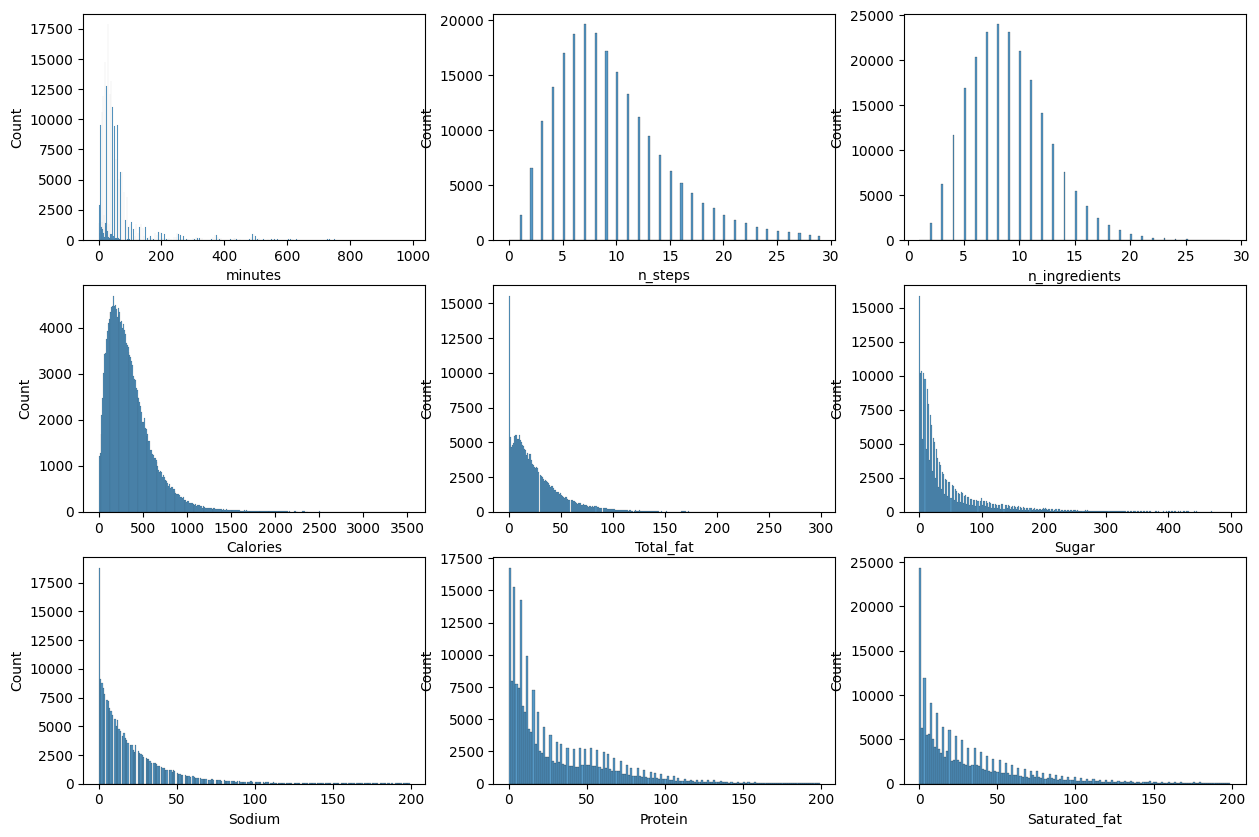

In [1179]:
fig, axs = plt.subplots(3,3, figsize=(15,10))

sns.histplot(df['minutes'], ax =axs[0][0])
sns.histplot(df['n_steps'], ax=axs[0][1])
sns.histplot(df['n_ingredients'], ax=axs[0][2])
sns.histplot(df['Calories'],ax =axs[1][0])
sns.histplot(df['Total_fat'],ax=axs[1][1])
sns.histplot(df['Sugar'], ax =axs[1][2])
sns.histplot(df['Sodium'], ax =axs[2][0])
sns.histplot(df['Protein'], ax =axs[2][1])
sns.histplot(df['Saturated_fat'], ax =axs[2][2])



**Initial Hypothesis: Miniutes, n_ingredient, calories, total_fat, sugar, protein,saturated_fat can be strong predictors


In [1180]:
df2

,name,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs,is_healthy
0,arriba baked winter squash mexican style,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,0
1,a bit different breakfast pizza,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,0
2,all in the kitchen chili,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,0
3,alouette potatoes,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,0
4,amish tomato ketchup for canning,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22,415.2,26.0,34.0,26.0,44.0,21.0,15.0,0
231633,zydeco spice mix,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13,14.8,0.0,2.0,58.0,1.0,0.0,1.0,1
231634,zydeco ya ya deviled eggs,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,59.2,6.0,2.0,3.0,6.0,5.0,0.0,1
231635,cookies by design cookies on a stick,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10,188.0,11.0,57.0,11.0,7.0,21.0,9.0,0


In [1181]:
df2.groupby(['Year', 'is_healthy'])['n_ingredients'].count().unstack()


KeyError: 'Year'

In [1182]:
df2['minutes'].describe()

count    214865.000000
mean         62.056487
std          90.685565
min           0.000000
25%          20.000000
50%          35.000000
75%          65.000000
max         990.000000
Name: minutes, dtype: float64

In [1193]:

bins = [0, 250, 500, 750, 991]
labels = ['0-249', '250-499', '500-749', '750-990']
df2['Minute Group'] = pd.cut(df2['minutes'], bins=bins, labels=labels)

In [1194]:
df2

,name,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs,is_healthy,Minute Group
0,arriba baked winter squash mexican style,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,0,0-249
1,a bit different breakfast pizza,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,0,0-249
2,all in the kitchen chili,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,0,0-249
3,alouette potatoes,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,0,0-249
4,amish tomato ketchup for canning,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0,0,0-249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22,415.2,26.0,34.0,26.0,44.0,21.0,15.0,0,0-249
231633,zydeco spice mix,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13,14.8,0.0,2.0,58.0,1.0,0.0,1.0,1,0-249
231634,zydeco ya ya deviled eggs,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,59.2,6.0,2.0,3.0,6.0,5.0,0.0,1,0-249
231635,cookies by design cookies on a stick,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10,188.0,11.0,57.0,11.0,7.0,21.0,9.0,0,0-249


In [1195]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214865 entries, 0 to 231636
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   name            214864 non-null  object  
 1   minutes         214865 non-null  int64   
 2   contributor_id  214865 non-null  int64   
 3   submitted       214865 non-null  object  
 4   tags            214865 non-null  object  
 5   n_steps         214865 non-null  int64   
 6   steps           214865 non-null  object  
 7   description     210417 non-null  object  
 8   ingredients     214865 non-null  object  
 9   n_ingredients   214865 non-null  int64   
 10  Calories        214865 non-null  float64 
 11  Total_fat       214865 non-null  float64 
 12  Sugar           214865 non-null  float64 
 13  Sodium          214865 non-null  float64 
 14  Protein         214865 non-null  float64 
 15  Saturated_fat   214865 non-null  float64 
 16  Carbs           214865 non-null  float64 
 